# Project_Finley_Daniel

# Section 0 - Application and data resource description

### Objective
The goal of this application is to explore the card transaction data and develop a model that predicts fraud based on the data. 

### Stakeholders
The stakeholders in the case can be considered both the card holders and the credit card companies. The card holders benefit from a accurate model by having fraudulant behavior flagged and quickly addressed. The company benefits by offering a strong model to their customers and preventing any complaints or cases of fraud raised against them. 

### Reference
https://www.kaggle.com/c/ieee-fraud-detection

# Section 1 - Initialization, feature selection, data processing and exploration

In [ ]:
# supress the display of warning messages
import warnings    
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install and import packages

In [ ]:
!pip install -U scikit-learn  

     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 206 kB 4.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
!pip install -U vega_datasets notebook vega

     |████████████████████████████████| 9.5 MB 4.0 MB/s 
     |████████████████████████████████| 1.3 MB 58.2 MB/s 
     |████████████████████████████████| 428 kB 49.2 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.0 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import gc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# Preprocessing, modelling and evaluating
import sklearn as sk

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text

from sklearn.model_selection import train_test_split, cross_validate,\
GridSearchCV, cross_val_score, KFold, ParameterGrid, StratifiedKFold

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support,\
accuracy_score, recall_score, precision_score, f1_score,\
confusion_matrix, classification_report

# Import libraries for additional metrics, plots, and GridSearchCV
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score,\
  plot_precision_recall_curve, precision_recall_curve, average_precision_score,\
  balanced_accuracy_score


# Method for anomaly detection
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.svm import SVC, LinearSVC

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier,\
BaggingClassifier, AdaBoostClassifier

# import feature selection methods
from sklearn.feature_selection import RFE, RFECV, SelectFromModel, SequentialFeatureSelector

In [ ]:
## Hyperopt modules
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from functools import partial

print(os.listdir("../content/drive/MyDrive/Colab Notebooks"))

['Project_M1_Finley_Daniel.ipynb', 'IEEE_Transaction_Fraud_supplemental_code_Trans_EDA_v1.ipynb', 'IEEE_Transaction_Fraud_supplemental_code_Identity_EDA_v1.ipynb', 'IEEE_Transaction_Fraud_supplemental_code_FS_v1_1.ipynb', 'IEEE_Transaction_Fraud_supplemental_code_1_v2.ipynb', 'IS6483_Tutorial_7_Graph_mining_1116.ipynb', 'train_identity.csv', 'train_transaction.csv', 'IEEE_Transaction_Fraud_supplemental_code_lgbm_xgb_v1.ipynb', 'sample_submission.csv', 'Project_M2_Finley_Daniel.ipynb', 'Copy of Project_M2_Finley_Daniel.ipynb']


Import ensemble classifiers for balanced data from imblearn

In [ ]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

from imblearn.ensemble import (BalancedBaggingClassifier,
                               BalancedRandomForestClassifier,
                               EasyEnsembleClassifier,
                               RUSBoostClassifier)


from imblearn.over_sampling import (RandomOverSampler, ADASYN, 
                                    SMOTE, BorderlineSMOTE, SVMSMOTE)
from imblearn.under_sampling import (RandomUnderSampler,
                                     ClusterCentroids,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)
from imblearn.combine import (SMOTEENN, SMOTETomek)

In [ ]:
# Balanced ensemble classifiers from imblearn.ensemble
brf = BalancedRandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)

In [ ]:
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff

In [ ]:
# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)

In [ ]:
# Install memory_profiler to monitor memory usage
!pip install -U memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30189 sha256=349729014acb69db6ddfdc8c0664a12f9643f4363400efa231581fba20a0f1d3
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


In [ ]:
import memory_profiler
import time
m1 = memory_profiler.memory_usage()
t1 = time.clock()
print(f' memory_usage: {m1}\n time.clock:{t1}\n')

 memory_usage: [225.43359375]
 time.clock:5.030876



## Load train_transaction and train_identity

Data is separated into two datasets: information about the identity of the customer and transaction information. Not all transactions belong to identities, which are available. Maybe it would be possible to use additional transactions to generate new features.

In [ ]:
#transaction data
train_transaction = pd.read_csv("/content/drive/My Drive/train_transaction.csv")

#identity data
train_identity = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_identity.csv")

## Import numeric variables only

In [ ]:
trans_num = train_transaction.select_dtypes(exclude='object')
trans_num.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Categorical Variables only

In [ ]:
trans_cat = train_transaction.select_dtypes(include='object')
trans_cat.head(5)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Database Exploration

In [ ]:
train_transaction.info

<bound method DataFrame.info of         TransactionID  isFraud  TransactionDT  ...  V337 V338  V339
0             2987000        0          86400  ...   NaN  NaN   NaN
1             2987001        0          86401  ...   NaN  NaN   NaN
2             2987002        0          86469  ...   NaN  NaN   NaN
3             2987003        0          86499  ...   NaN  NaN   NaN
4             2987004        0          86506  ...   0.0  0.0   0.0
...               ...      ...            ...  ...   ...  ...   ...
590535        3577535        0       15811047  ...   NaN  NaN   NaN
590536        3577536        0       15811049  ...   NaN  NaN   NaN
590537        3577537        0       15811079  ...   NaN  NaN   NaN
590538        3577538        0       15811088  ...   NaN  NaN   NaN
590539        3577539        0       15811131  ...   NaN  NaN   NaN

[590540 rows x 394 columns]>

In [ ]:
train_identity.info

<bound method DataFrame.info of         TransactionID  id_01  ...  DeviceType                          DeviceInfo
0             2987004    0.0  ...      mobile       SAMSUNG SM-G892A Build/NRD90M
1             2987008   -5.0  ...      mobile                          iOS Device
2             2987010   -5.0  ...     desktop                             Windows
3             2987011   -5.0  ...     desktop                                 NaN
4             2987016    0.0  ...     desktop                               MacOS
...               ...    ...  ...         ...                                 ...
144228        3577521  -15.0  ...      mobile             F3111 Build/33.3.A.1.97
144229        3577526   -5.0  ...      mobile                 A574BL Build/NMF26F
144230        3577529  -20.0  ...      mobile  Moto E (4) Plus Build/NMA26.42-152
144231        3577531   -5.0  ...     desktop                               MacOS
144232        3577534  -45.0  ...      mobile         RNE-L03 Buil

In [ ]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [ ]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [ ]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [ ]:
train_transaction.head(40)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.000000,354.000000,0.000000,135.000000,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.

In [ ]:
len(train_transaction.TransactionID.unique())

590540

In [ ]:
train_transaction.value_counts('isFraud', normalize=True) 

isFraud
0    0.96501
1    0.03499
dtype: float64

In [ ]:
train_transaction['TransactionDT'].quantile(np.linspace(0,1,11))

0.0       86400.0
0.1     1361004.4
0.2     2310159.6
0.3     3864163.9
0.4     5592303.6
0.5     7306527.5
0.6     8745782.4
0.7    10437998.1
0.8    12192853.6
0.9    13990907.7
1.0    15811131.0
Name: TransactionDT, dtype: float64

In [ ]:
train_transaction['TransactionID'].quantile(np.linspace(0,1,11))

0.0    2987000.0
0.1    3046053.9
0.2    3105107.8
0.3    3164161.7
0.4    3223215.6
0.5    3282269.5
0.6    3341323.4
0.7    3400377.3
0.8    3459431.2
0.9    3518485.1
1.0    3577539.0
Name: TransactionID, dtype: float64

In [ ]:
for i in train_transaction.columns:
  print(f'{i} has {train_transaction[i].isnull().sum()/train_transaction.shape[0]} % of NaN\n')

TransactionID has 0.0 % of NaN

isFraud has 0.0 % of NaN

TransactionDT has 0.0 % of NaN

TransactionAmt has 0.0 % of NaN

ProductCD has 0.0 % of NaN

card1 has 0.0 % of NaN

card2 has 0.015126833068039422 % of NaN

card3 has 0.0026501168422122124 % of NaN

card4 has 0.00267043722694483 % of NaN

card5 has 0.007212043214684865 % of NaN

card6 has 0.0026602770345785214 % of NaN

addr1 has 0.1112642666034477 % of NaN

addr2 has 0.1112642666034477 % of NaN

dist1 has 0.596523520845328 % of NaN

dist2 has 0.9362837403054831 % of NaN

P_emaildomain has 0.1599485216920107 % of NaN

R_emaildomain has 0.7675161716395164 % of NaN

C1 has 0.0 % of NaN

C2 has 0.0 % of NaN

C3 has 0.0 % of NaN

C4 has 0.0 % of NaN

C5 has 0.0 % of NaN

C6 has 0.0 % of NaN

C7 has 0.0 % of NaN

C8 has 0.0 % of NaN

C9 has 0.0 % of NaN

C10 has 0.0 % of NaN

C11 has 0.0 % of NaN

C12 has 0.0 % of NaN

C13 has 0.0 % of NaN

C14 has 0.0 % of NaN

D1 has 0.0021488806854743116 % of NaN

D2 has 0.4754919226470688 % of N

In [ ]:
for i in train_identity.columns:
  print(f'{i} has {train_identity[i].isnull().sum()/train_identity.shape[0]} % of NaN\n')

TransactionID has 0.0 % of NaN

id_01 has 0.0 % of NaN

id_02 has 0.0233025729202055 % of NaN

id_03 has 0.5401607121809849 % of NaN

id_04 has 0.5401607121809849 % of NaN

id_05 has 0.05108400990064687 % of NaN

id_06 has 0.05108400990064687 % of NaN

id_07 has 0.9642592194574058 % of NaN

id_08 has 0.9642592194574058 % of NaN

id_09 has 0.4805211012736336 % of NaN

id_10 has 0.4805211012736336 % of NaN

id_11 has 0.02256765095366525 % of NaN

id_12 has 0.0 % of NaN

id_13 has 0.11726165301976663 % of NaN

id_14 has 0.4450368500967185 % of NaN

id_15 has 0.022519118370969194 % of NaN

id_16 has 0.10325653629890524 % of NaN

id_17 has 0.033723211747658306 % of NaN

id_18 has 0.6872213709761289 % of NaN

id_19 has 0.034076806278729554 % of NaN

id_20 has 0.034472000166397426 % of NaN

id_21 has 0.9642314865530079 % of NaN

id_22 has 0.9641621542920136 % of NaN

id_23 has 0.9641621542920136 % of NaN

id_24 has 0.9670879757059757 % of NaN

id_25 has 0.9644186836576928 % of NaN

id_26 has 

## Resume tables, Memory Reduction, and Outliers

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [ ]:
## Reducing memory
train_transaction = reduce_mem_usage(train_transaction)
train_identity = reduce_mem_usage(train_identity)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [ ]:
resumetable(train_transaction)[:25]

Dataset Shape: (590540, 394)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,TransactionID,int32,0,590540,2987000,2987001,2987002,19.17
1,isFraud,int8,0,2,0,0,0,0.22
2,TransactionDT,int32,0,573349,86400,86401,86469,19.11
3,TransactionAmt,float16,0,8195,68.5,29,59,8.10
4,ProductCD,object,0,5,W,W,W,1.28
5,card1,int16,0,13553,13926,2755,4663,9.97
6,card2,float16,8933,500,NaN,404,490,6.32
7,card3,float16,1565,114,150,150,150,0.68
8,card4,object,1577,4,discover,mastercard,visa,1.09
9,card5,float16,4259,119,142,102,166,2.66


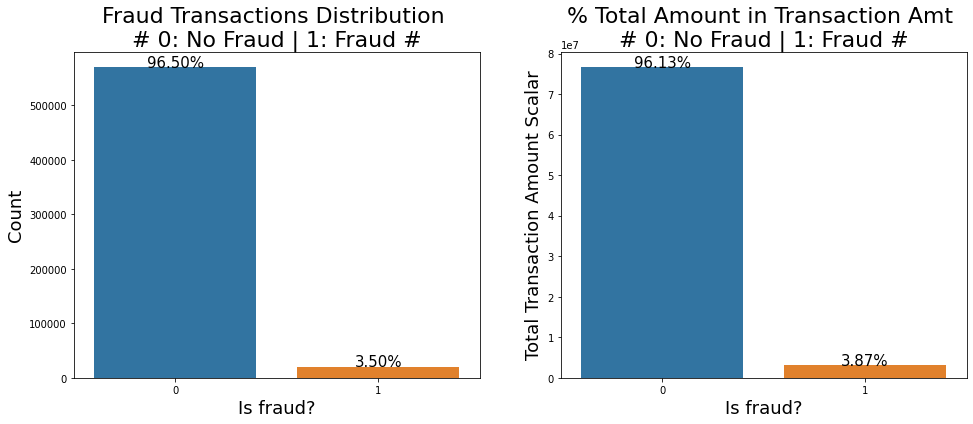

In [ ]:
train_transaction['TransactionAmt'] = train_transaction['TransactionAmt'].astype(float)
total = len(train_transaction)
total_amt = train_transaction.groupby(['isFraud'])['TransactionAmt'].sum().sum()
plt.figure(figsize=(16,6))

plt.subplot(121)
g = sns.countplot(x='isFraud', data=train_transaction, )
g.set_title("Fraud Transactions Distribution \n# 0: No Fraud | 1: Fraud #", fontsize=22)
g.set_xlabel("Is fraud?", fontsize=18)
g.set_ylabel('Count', fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

perc_amt = (train_transaction.groupby(['isFraud'])['TransactionAmt'].sum())
perc_amt = perc_amt.reset_index()
plt.subplot(122)
g1 = sns.barplot(x='isFraud', y='TransactionAmt',  dodge=True, data=perc_amt)
g1.set_title("% Total Amount in Transaction Amt \n# 0: No Fraud | 1: Fraud #", fontsize=22)
g1.set_xlabel("Is fraud?", fontsize=18)
g1.set_ylabel('Total Transaction Amount Scalar', fontsize=18)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15) 
    
plt.show()

This illustrates a 3.5% instance of fraud in the dataset

### Transaction Amount Quantiles

In [ ]:
train_transaction['TransactionAmt'] = train_transaction['TransactionAmt'].astype(float)
print("Transaction Amounts Quantiles:")
print(train_transaction['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Transaction Amounts Quantiles:
0.010       9.242188
0.025      14.500000
0.100      25.953125
0.250      43.312500
0.500      68.750000
0.750     125.000000
0.900     275.250000
0.975     648.262500
0.990    1104.000000
Name: TransactionAmt, dtype: float64


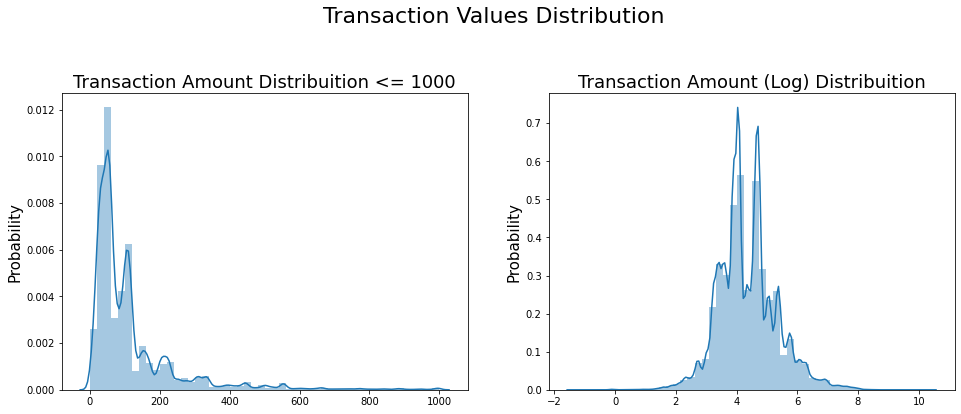

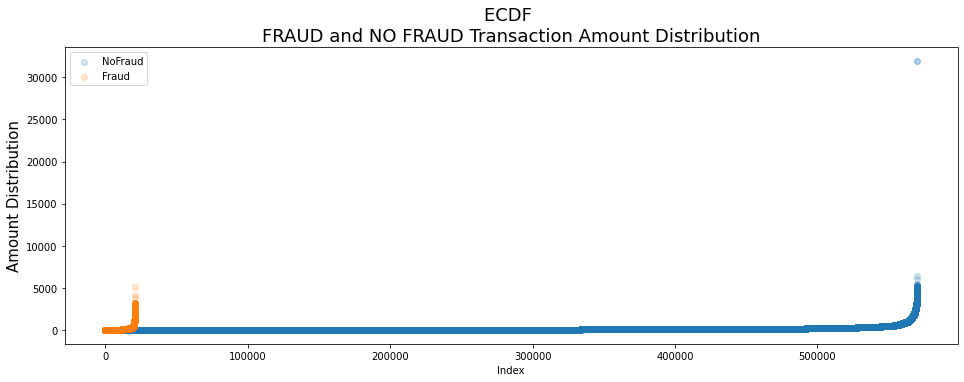

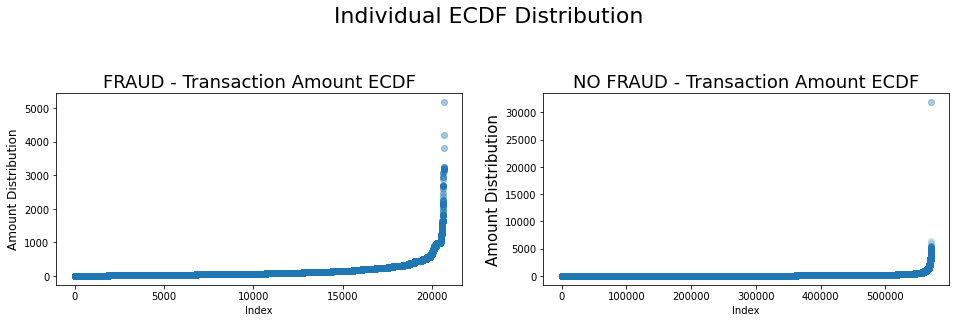

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(train_transaction[train_transaction['TransactionAmt'] <= 1000]['TransactionAmt'])
g.set_title("Transaction Amount Distribuition <= 1000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(train_transaction['TransactionAmt']))
g1.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
g1.set_xlabel("")
g1.set_ylabel("Probability", fontsize=15)

plt.figure(figsize=(16,12))


plt.subplot(212)
g4 = plt.scatter(range(train_transaction[train_transaction['isFraud'] == 0].shape[0]),
                 np.sort(train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(train_transaction[train_transaction['isFraud'] == 1].shape[0]),
                 np.sort(train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Amount Distribution", fontsize=15)
g4 = plt.legend()

plt.figure(figsize=(16,12))

plt.subplot(321)
g = plt.scatter(range(train_transaction[train_transaction['isFraud'] == 1].shape[0]), 
                 np.sort(train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt'].values), 
                label='isFraud', alpha=.4)
plt.title("FRAUD - Transaction Amount ECDF", fontsize=18)
plt.xlabel("Index")
plt.ylabel("Amount Distribution", fontsize=12)

plt.subplot(322)
g1 = plt.scatter(range(train_transaction[train_transaction['isFraud'] == 0].shape[0]),
                 np.sort(train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt'].values), 
                 label='NoFraud', alpha=.2)
g1= plt.title("NO FRAUD - Transaction Amount ECDF", fontsize=18)
g1 = plt.xlabel("Index")
g1 = plt.ylabel("Amount Distribution", fontsize=15)

plt.suptitle('Individual ECDF Distribution', fontsize=22)

plt.show()

In [ ]:
print(pd.concat([train_transaction[train_transaction['isFraud'] == 1]['TransactionAmt']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index(), 
                 train_transaction[train_transaction['isFraud'] == 0]['TransactionAmt']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index()],
                axis=1, keys=['Fraud', "No Fraud"]))

  Fraud                No Fraud               
  index TransactionAmt    index TransactionAmt
0  0.01       6.739453     0.01       9.511875
1  0.10      18.937500     0.10      26.312500
2  0.25      35.031250     0.25      43.968750
3  0.50      75.000000     0.50      68.500000
4  0.75     161.000000     0.75     120.000000
5  0.90     335.000000     0.90     267.100000
6  0.99     994.000000     0.99    1104.000000


### Quantile Outliers


In [ ]:
CalcOutliers(train_transaction['TransactionAmt'])

Identified lowest outliers: 0
Identified upper outliers: 10097
Total outlier observations: 10097
Non-outlier observations: 580443
Total percentual of Outliers:  1.7395


1.74% of rows have outliers


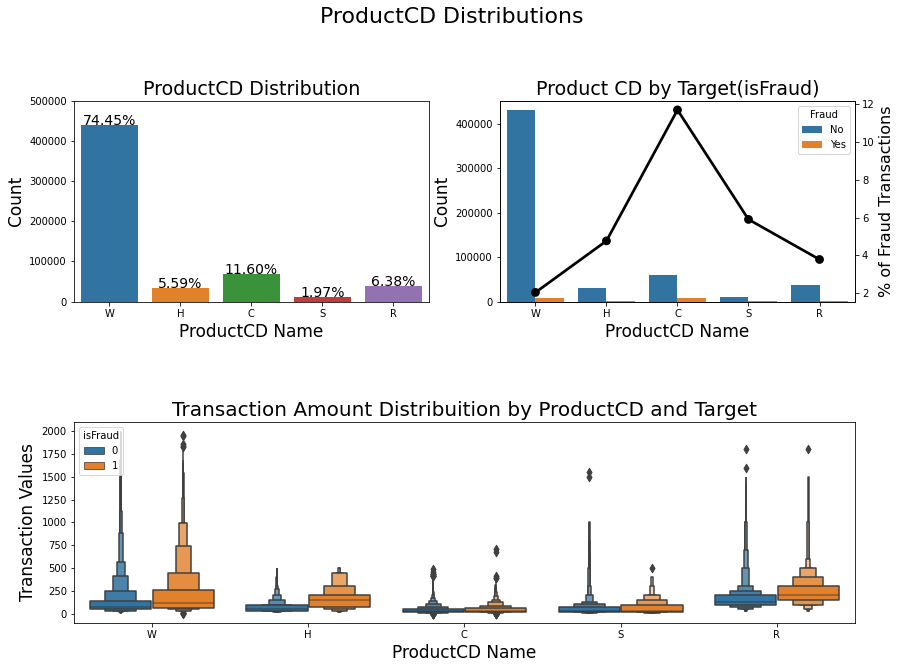

In [ ]:
tmp = pd.crosstab(train_transaction['ProductCD'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('ProductCD Distributions', fontsize=22)

plt.subplot(221)
g = sns.countplot(x='ProductCD', data=train_transaction)


g.set_title("ProductCD Distribution", fontsize=19)
g.set_xlabel("ProductCD Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_ylim(0,500000)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplot(222)
g1 = sns.countplot(x='ProductCD', hue='isFraud', data=train_transaction)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='ProductCD', y='Fraud', data=tmp, color='black', order=['W', 'H',"C", "S", "R"], legend=False)
gt.set_ylabel("% of Fraud Transactions", fontsize=16)

g1.set_title("Product CD by Target(isFraud)", fontsize=19)
g1.set_xlabel("ProductCD Name", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplot(212)
g3 = sns.boxenplot(x='ProductCD', y='TransactionAmt', hue='isFraud', 
              data=train_transaction[train_transaction['TransactionAmt'] <= 2000] )
g3.set_title("Transaction Amount Distribuition by ProductCD and Target", fontsize=20)
g3.set_xlabel("ProductCD Name", fontsize=17)
g3.set_ylabel("Transaction Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

W is by far the most frequent value

## Card Features


In [ ]:
## Knowning the Card Features
resumetable(train_transaction[['card1', 'card2', 'card3','card4', 'card5', 'card6']])

Dataset Shape: (590540, 6)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,card1,int16,0,13553,13926,2755,4663,9.97
1,card2,float16,8933,500,NaN,404,490,6.32
2,card3,float16,1565,114,150,150,150,0.68
3,card4,object,1577,4,discover,mastercard,visa,1.09
4,card5,float16,4259,119,142,102,166,2.66
5,card6,object,1571,4,credit,credit,debit,0.82


Lots of missing data right now. 

In [ ]:
print("Card Features Quantiles: ")
print(train_transaction[['card1', 'card2', 'card3', 'card5']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

Card Features Quantiles: 
         card1  card2  card3  card5
0.010   1338.0  100.0  144.0  102.0
0.025   1675.0  111.0  150.0  102.0
0.100   2803.0  111.0  150.0  126.0
0.250   6019.0  214.0  150.0  166.0
0.500   9678.0  361.0  150.0  226.0
0.750  14184.0  512.0  150.0  226.0
0.975  18018.0  583.0  185.0  226.0
0.990  18238.0  583.0  185.0  226.0


In [ ]:
train_transaction.loc[train_transaction.card3.isin(train_transaction.card3.value_counts()[train_transaction.card3.value_counts() < 200].index), 'card3'] = "Others"
train_transaction.loc[train_transaction.card5.isin(train_transaction.card5.value_counts()[train_transaction.card5.value_counts() < 300].index), 'card5'] = "Others"

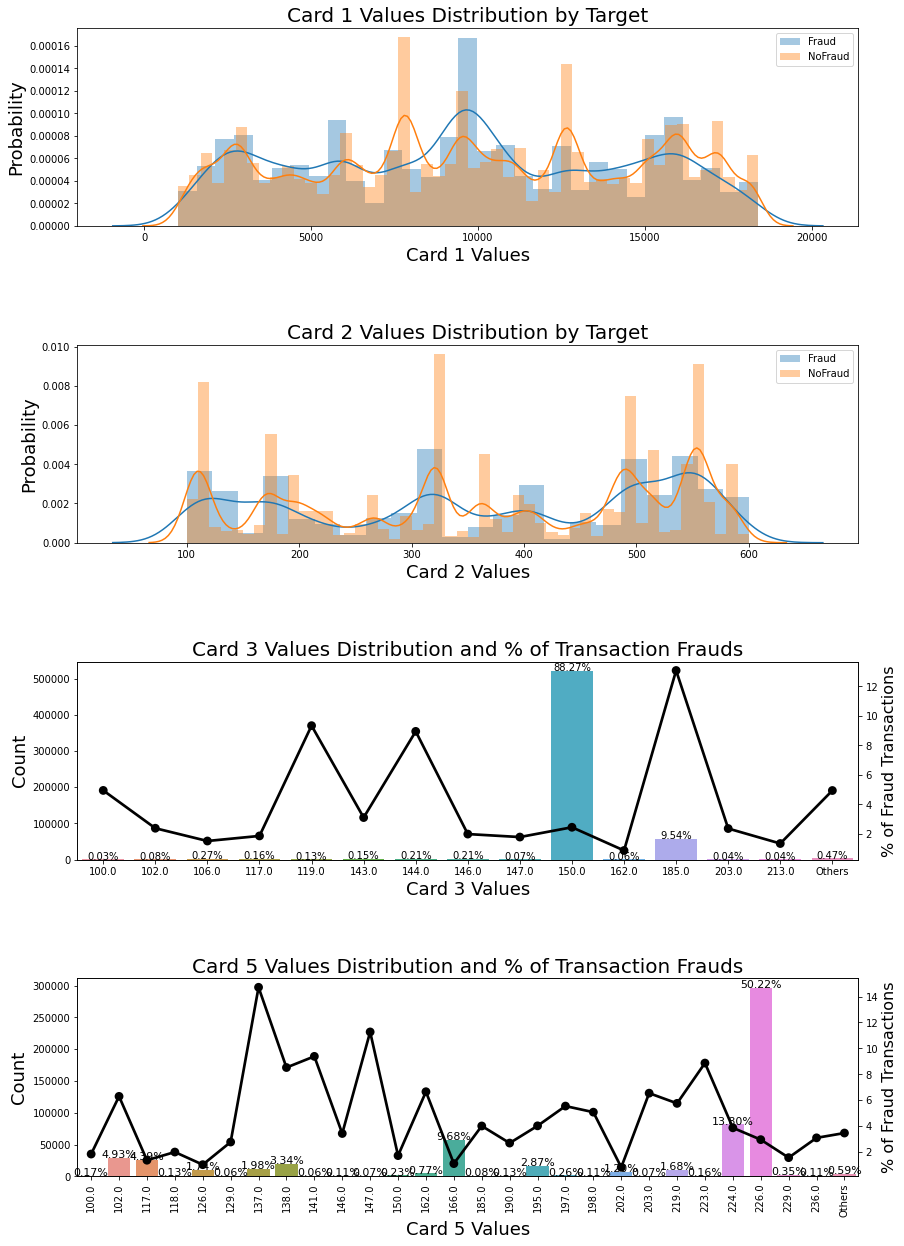

In [ ]:
tmp = pd.crosstab(train_transaction['card3'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

tmp2 = pd.crosstab(train_transaction['card5'], train_transaction['isFraud'], normalize='index') * 100
tmp2 = tmp2.reset_index()
tmp2.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,22))

plt.subplot(411)
g = sns.distplot(train_transaction[train_transaction['isFraud'] == 1]['card1'], label='Fraud')
g = sns.distplot(train_transaction[train_transaction['isFraud'] == 0]['card1'], label='NoFraud')
g.legend()
g.set_title("Card 1 Values Distribution by Target", fontsize=20)
g.set_xlabel("Card 1 Values", fontsize=18)
g.set_ylabel("Probability", fontsize=18)

plt.subplot(412)
g1 = sns.distplot(train_transaction[train_transaction['isFraud'] == 1]['card2'].dropna(), label='Fraud')
g1 = sns.distplot(train_transaction[train_transaction['isFraud'] == 0]['card2'].dropna(), label='NoFraud')
g1.legend()
g1.set_title("Card 2 Values Distribution by Target", fontsize=20)
g1.set_xlabel("Card 2 Values", fontsize=18)
g1.set_ylabel("Probability", fontsize=18)

plt.subplot(413)
g2 = sns.countplot(x='card3', data=train_transaction, order=list(tmp.card3.values))
g22 = g2.twinx()
gg2 = sns.pointplot(x='card3', y='Fraud', data=tmp, 
                    color='black', order=list(tmp.card3.values))
gg2.set_ylabel("% of Fraud Transactions", fontsize=16)
g2.set_title("Card 3 Values Distribution and % of Transaction Frauds", fontsize=20)
g2.set_xlabel("Card 3 Values", fontsize=18)
g2.set_ylabel("Count", fontsize=18)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 

plt.subplot(414)
g3 = sns.countplot(x='card5', data=train_transaction, order=list(tmp2.card5.values))
g3t = g3.twinx()
g3t = sns.pointplot(x='card5', y='Fraud', data=tmp2, 
                    color='black', order=list(tmp2.card5.values))
g3t.set_ylabel("% of Fraud Transactions", fontsize=16)
g3.set_title("Card 5 Values Distribution and % of Transaction Frauds", fontsize=20)
g3.set_xticklabels(g3.get_xticklabels(),rotation=90)
g3.set_xlabel("Card 5 Values", fontsize=18)
g3.set_ylabel("Count", fontsize=18)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=11) 
    
plt.subplots_adjust(hspace = 0.6, top = 0.85)


plt.show()

Fraud transactions seem to have a strong correlation with certain values inside of certain cards. Also, certain cards have a very high correlation with certain values. For instance, card three shows that over 88% of the values were for 150. 

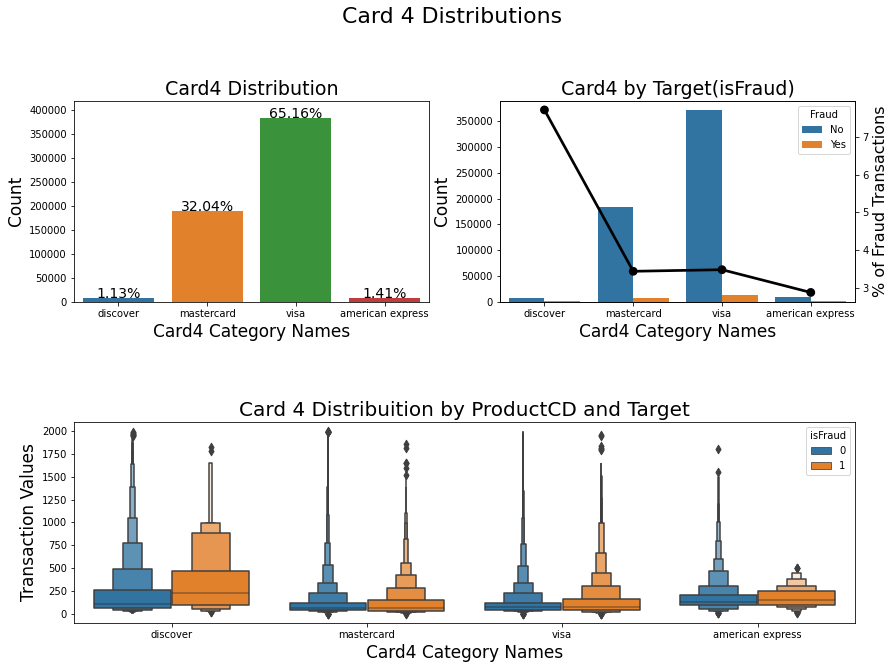

In [ ]:
tmp = pd.crosstab(train_transaction['card4'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card 4 Distributions', fontsize=22)

plt.subplot(221)
g = sns.countplot(x='card4', data=train_transaction)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Card4 Distribution", fontsize=19)
g.set_ylim(0,420000)
g.set_xlabel("Card4 Category Names", fontsize=17)
g.set_ylabel("Count", fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 


plt.subplot(222)
g1 = sns.countplot(x='card4', hue='isFraud', data=train_transaction)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='card4', y='Fraud', data=tmp, 
                   color='black', legend=False, 
                   order=['discover', 'mastercard', 'visa', 'american express'])
gt.set_ylabel("% of Fraud Transactions", fontsize=16)
g1.set_title("Card4 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card4 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplot(212)
g3 = sns.boxenplot(x='card4', y='TransactionAmt', hue='isFraud', 
              data=train_transaction[train_transaction['TransactionAmt'] <= 2000] )
g3.set_title("Card 4 Distribuition by ProductCD and Target", fontsize=20)
g3.set_xlabel("Card4 Category Names", fontsize=17)
g3.set_ylabel("Transaction Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

Highest percent seen here is around 8% with discover cards and lowest is around 2.8% with American Express. This could be a function of the number of transactions in this database. 

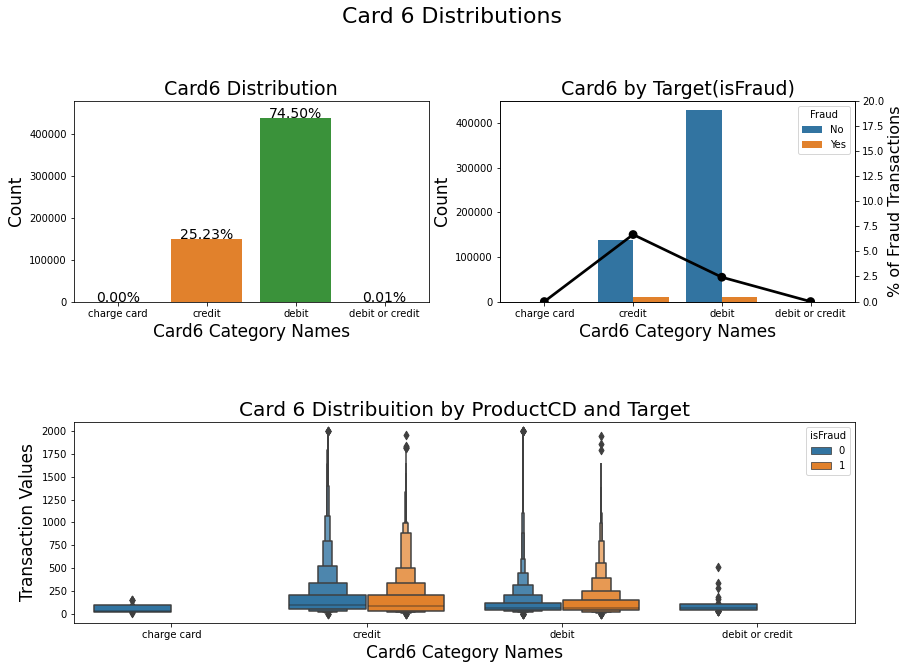

In [ ]:
tmp = pd.crosstab(train_transaction['card6'], train_transaction['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('Card 6 Distributions', fontsize=22)

plt.subplot(221)
g = sns.countplot(x='card6', data=train_transaction, order=list(tmp.card6.values))
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
g.set_title("Card6 Distribution", fontsize=19)
g.set_ylim(0,480000)
g.set_xlabel("Card6 Category Names", fontsize=17)
g.set_ylabel("Count", fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 

plt.subplot(222)
g1 = sns.countplot(x='card6', hue='isFraud', data=train_transaction, order=list(tmp.card6.values))
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='card6', y='Fraud', data=tmp, order=list(tmp.card6.values),
                   color='black', legend=False, )
gt.set_ylim(0,20)
gt.set_ylabel("% of Fraud Transactions", fontsize=16)
g1.set_title("Card6 by Target(isFraud)", fontsize=19)
g1.set_xlabel("Card6 Category Names", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplot(212)
g3 = sns.boxenplot(x='card6', y='TransactionAmt', hue='isFraud', order=list(tmp.card6.values),
              data=train_transaction[train_transaction['TransactionAmt'] <= 2000] )
g3.set_title("Card 6 Distribuition by ProductCD and Target", fontsize=20)
g3.set_xlabel("Card6 Category Names", fontsize=17)
g3.set_ylabel("Transaction Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

## M Features

In [ ]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    train_transaction[col] = train_transaction[col].fillna("Miss")
    
def ploting_dist_ratio(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    plt.figure(figsize=(20,5))
    plt.suptitle(f'{col} Distributions ', fontsize=22)

    plt.subplot(121)
    g = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    # plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])
    g.set_title(f"{col} Distribution\nCound and %Fraud by each category", fontsize=18)
    g.set_ylim(0,400000)
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,20)
    gt.set_ylabel("% of Fraud Transactions", fontsize=16)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    for p in gt.patches:
        height = p.get_height()
        gt.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=14) 
        
    perc_amt = (train_transaction.groupby(['isFraud',col])['TransactionAmt'].sum() / total_amt * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    plt.subplot(122)
    g1 = sns.boxplot(x=col, y='TransactionAmt', hue='isFraud', 
                     data=df[df['TransactionAmt'] <= lim], order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,5)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g1.set_title(f"{col} by Transactions dist", fontsize=18)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Amount(U$)", fontsize=16)
        
    plt.subplots_adjust(hspace=.4, wspace = 0.35, top = 0.80)
    
    plt.show()

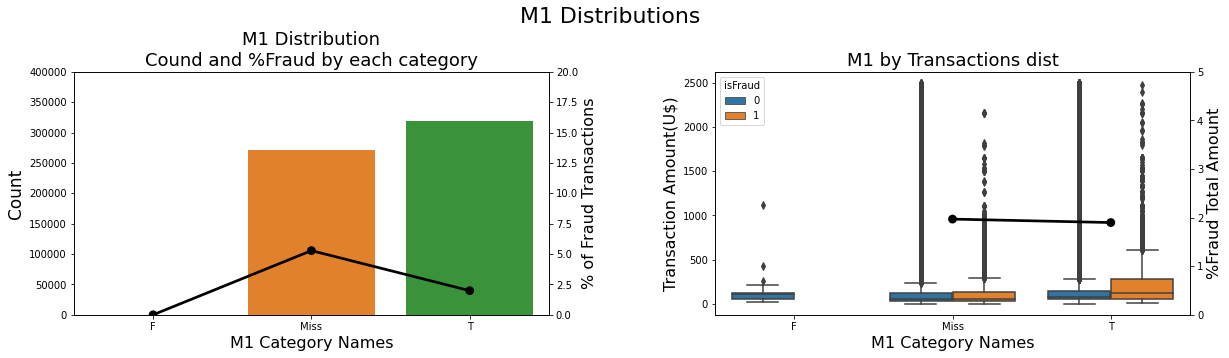

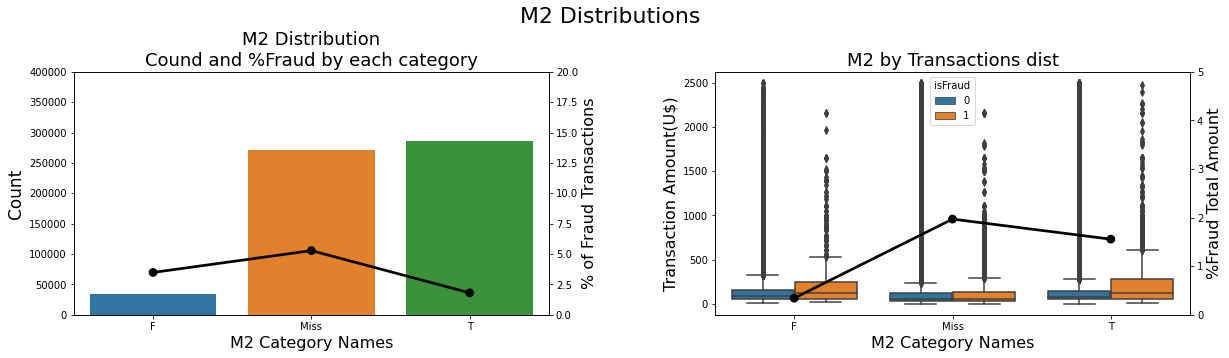

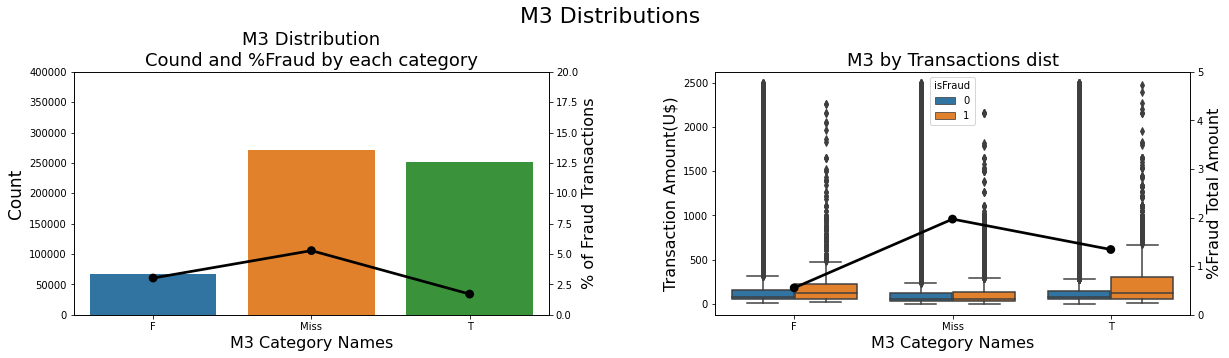

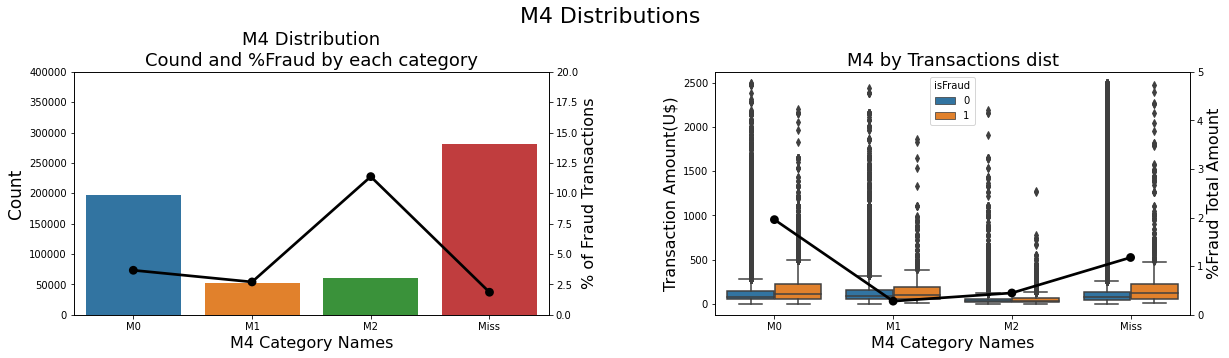

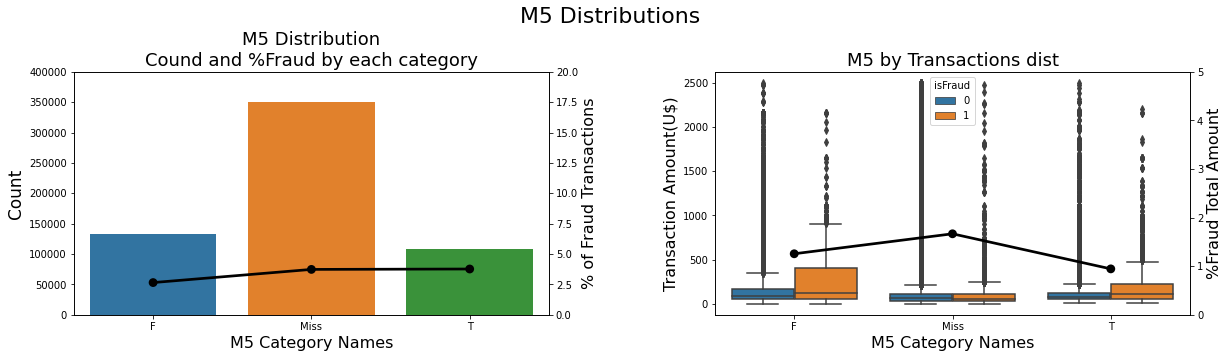

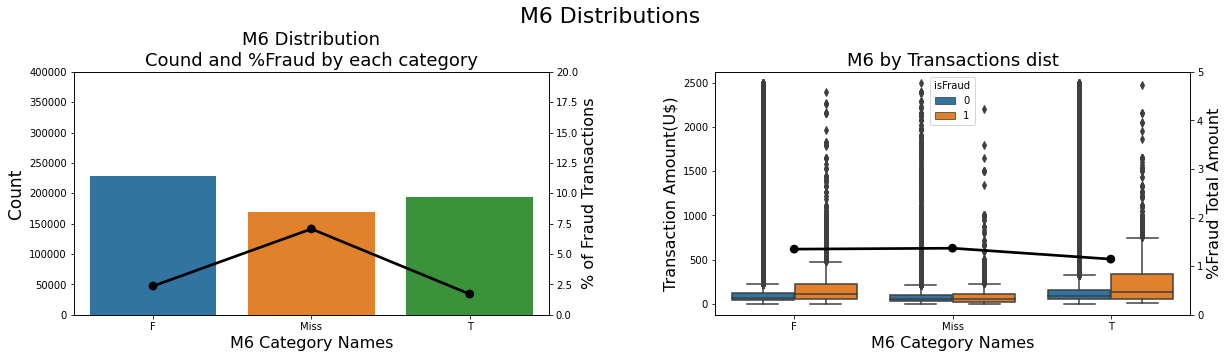

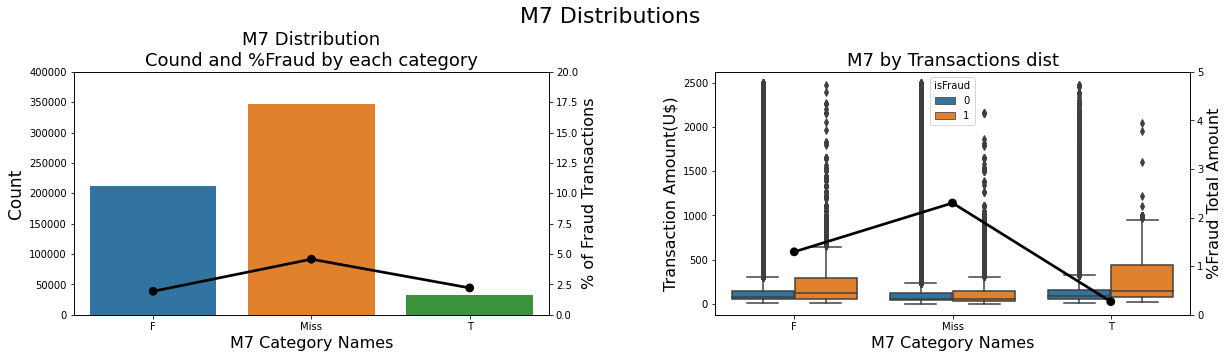

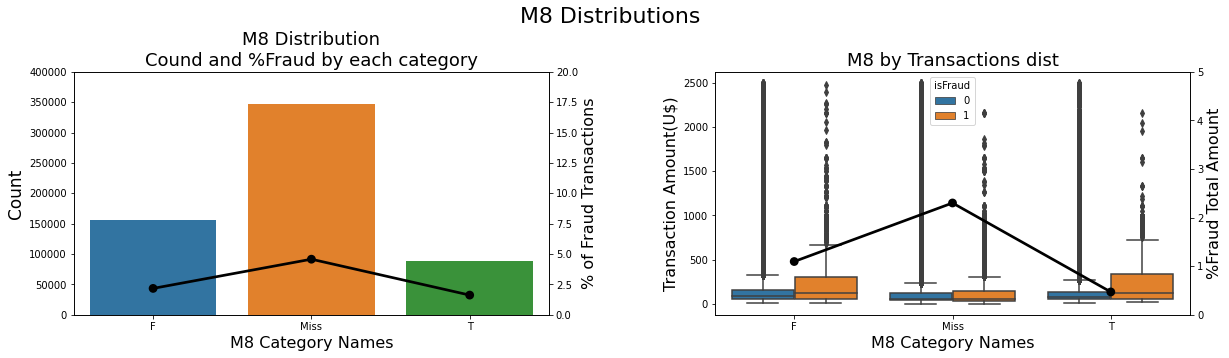

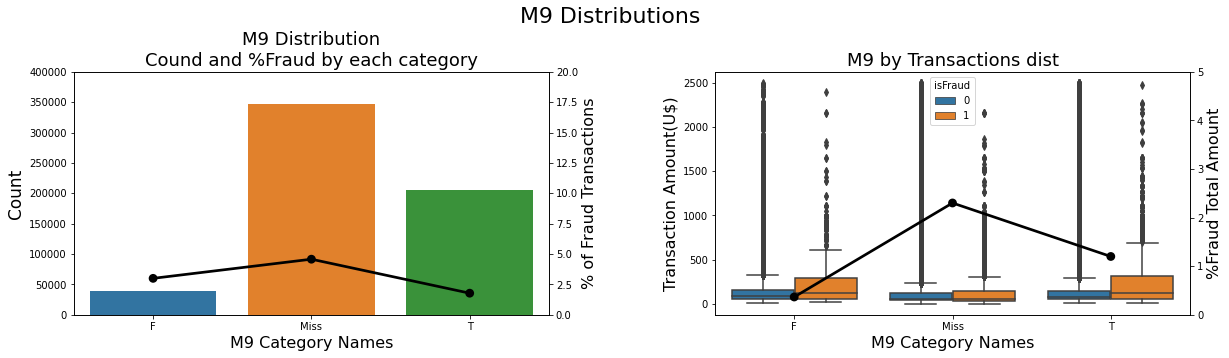

In [ ]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    ploting_dist_ratio(train_transaction, col, lim=2500)

T or F are interchangeable and don't seem to be a strong indicator but M data classified as Miss have the highest percent of fraud in all the sets except M4 which is classified differently. 

## Time Features

In [ ]:
 def ploting_cnt_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
                / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    g1 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)    
    
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()
    

### Convert to Total Days, Weekends, and Hours

In [ ]:
import datetime

START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
train_transaction["Date"] = train_transaction['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

train_transaction['_Weekdays'] = train_transaction['Date'].dt.dayofweek
train_transaction['_Hours'] = train_transaction['Date'].dt.hour
train_transaction['_Days'] = train_transaction['Date'].dt.day

### All days

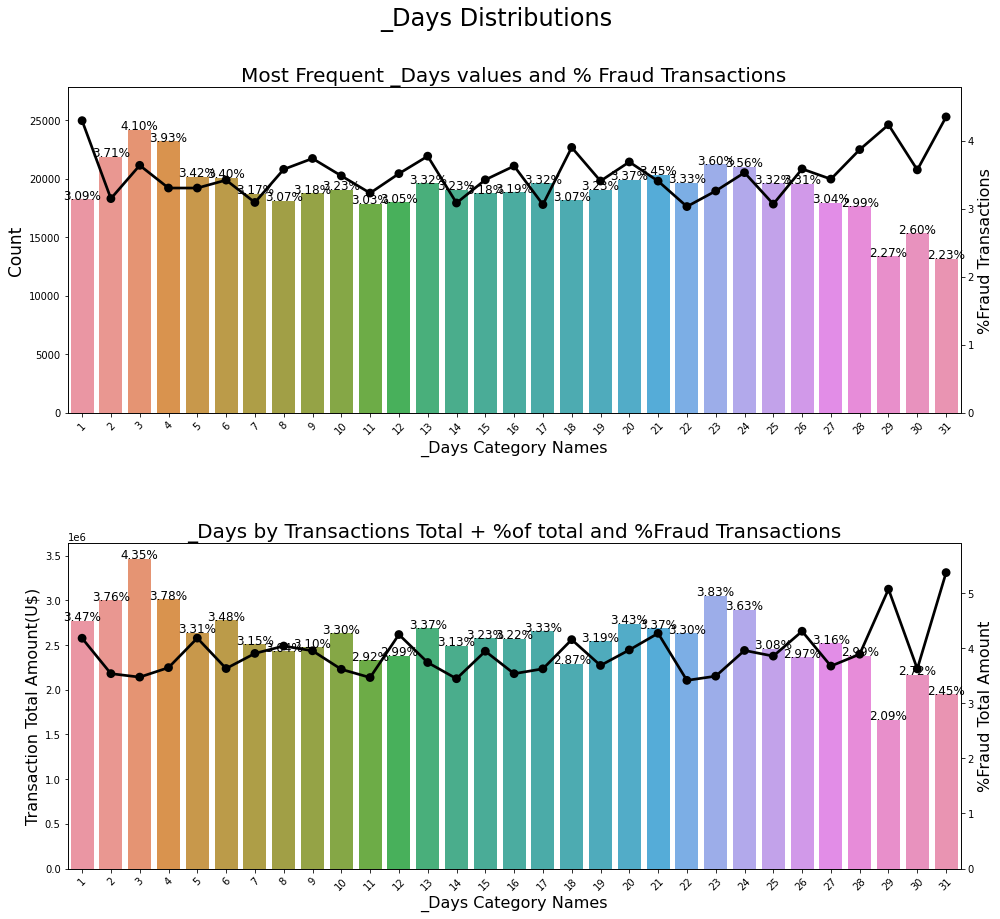

In [ ]:
ploting_cnt_amt(train_transaction, '_Days')

### Weekdays

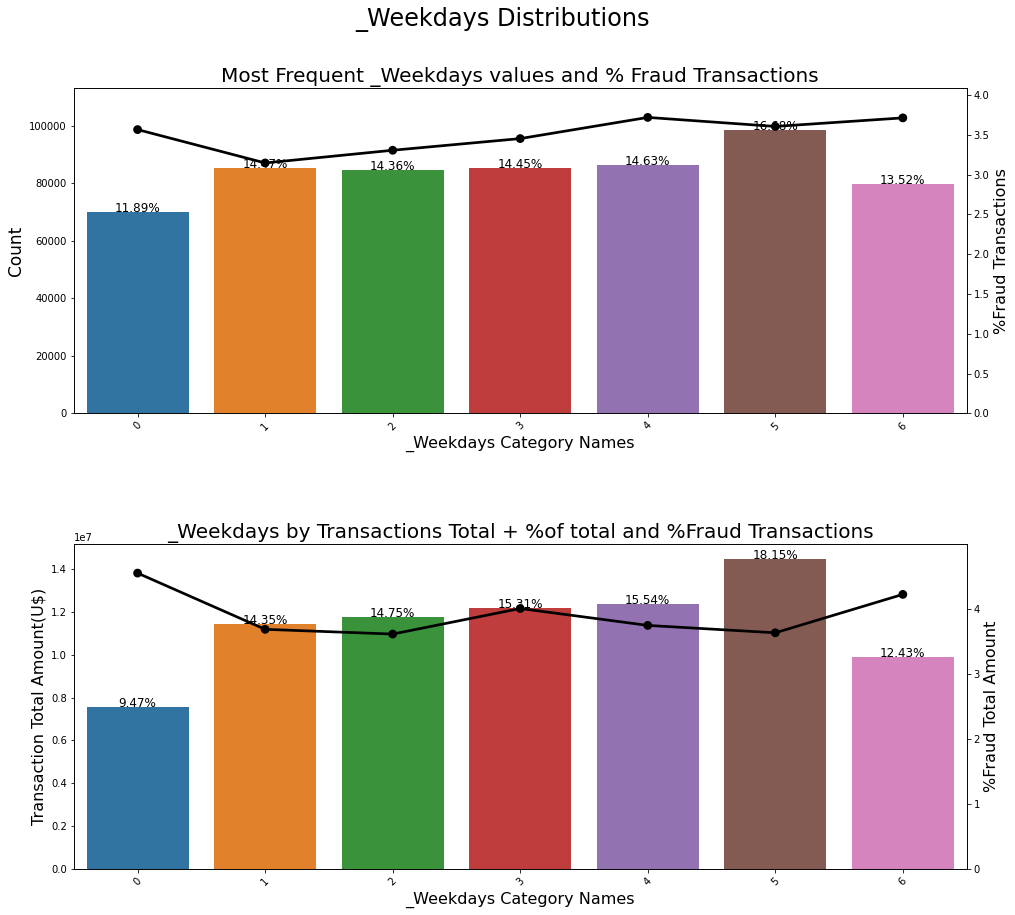

In [ ]:
ploting_cnt_amt(train_transaction, '_Weekdays')

### All Hours

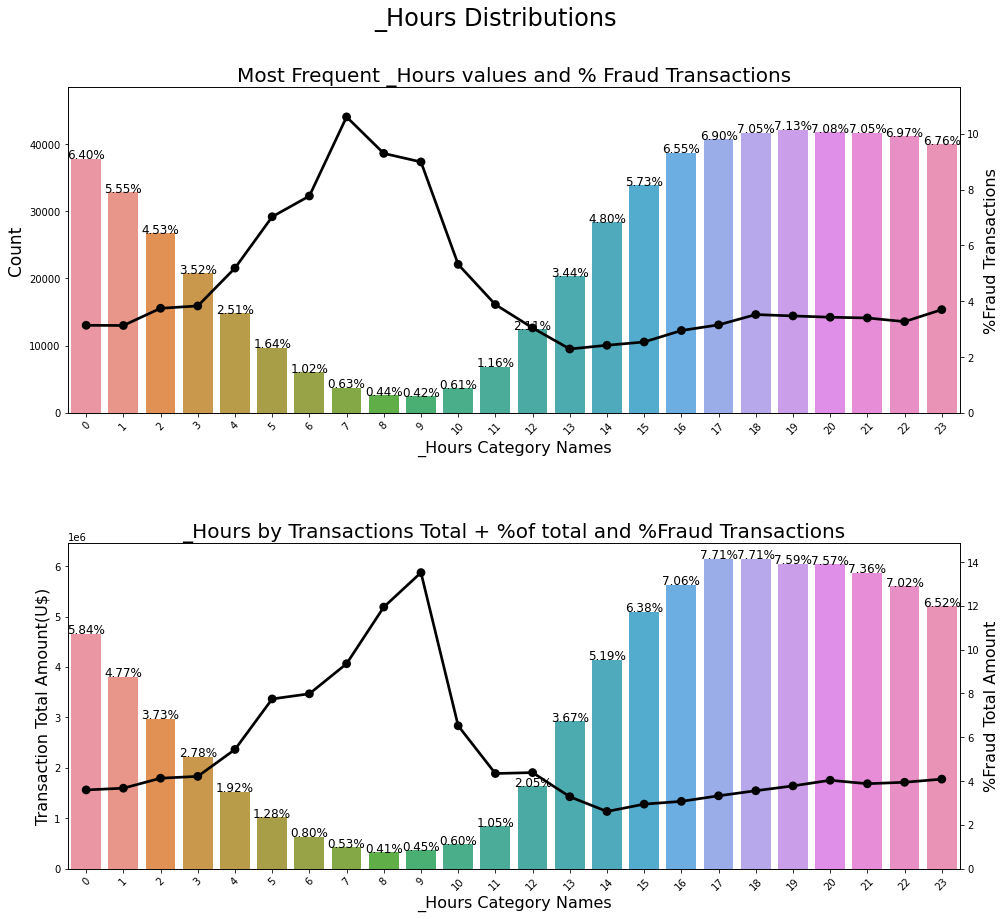

In [ ]:
ploting_cnt_amt(train_transaction, '_Hours')

We can see there there is a strong correlation between the day of the week/time of day and the percentage of fraud. From these graphs, it seems that most fraud happens in the evening and during the week. 

## Reload the data

In [ ]:
#transaction data
train_transaction = pd.read_csv("/content/drive/My Drive/train_transaction.csv")

#identity data
train_identity = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_identity.csv")

## Feature reduction, missing data handling

### Reduction

Reduce the number of predictor variables to 50

In [ ]:
# create trans to store columns with low missingness
trans = pd.DataFrame()
# drop columns that would generate a large number of dummy variables
features = list(train_transaction.columns)
to_remove = ['TransactionID','TransactionDT','R_emaildomain','P_emaildomain']
for i in to_remove:
  features.remove(i)
# drop columns with high missingness
for i in features:
  if train_transaction[i].isnull().sum()/train_transaction.shape[0] < 0.0005:
    trans[i] = train_transaction[i].copy()
print(trans.shape[1],'\n', trans.columns)

50 
 Index(['isFraud', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292',
       'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304',
       'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316',
       'V317', 'V318', 'V319', 'V320', 'V321'],
      dtype='object')


In [ ]:
trans.info

<bound method DataFrame.info of         isFraud  TransactionAmt ProductCD  ...        V319        V320        V321
0             0           68.50         W  ...    0.000000    0.000000    0.000000
1             0           29.00         W  ...    0.000000    0.000000    0.000000
2             0           59.00         W  ...    0.000000    0.000000    0.000000
3             0           50.00         W  ...    0.000000    0.000000    0.000000
4             0           50.00         H  ...    0.000000    0.000000    0.000000
...         ...             ...       ...  ...         ...         ...         ...
590535        0           49.00         W  ...    0.000000    0.000000    0.000000
590536        0           39.50         W  ...    0.000000    0.000000    0.000000
590537        0           30.95         W  ...    0.000000    0.000000    0.000000
590538        0          117.00         W  ...    0.000000    0.000000    0.000000
590539        0          279.95         W  ...  279.950


Data has been reduced from 590540 rows x 394 columns to 590540 rows x 50 columns.
Eliminating 344 columns

### Missing data

In [ ]:
# Encodes categorical variables and nafill categorical null values with 'none'
 # Replace NaN in numeric variables with column means or medians
def fun_fillna_enc(df_name,df,y_col,cat_c,num_fillna,num_c): 
  # separate target and features
  df_target =df[y_col].copy().reset_index(drop=True)
  df_features = df.drop(y_col, axis=1)
  # Separate numeric and categorical predictors
  df_num_features = df_features.select_dtypes(exclude=['object'])
  df_cat_features = df_features.select_dtypes(include=['object'])
  # impute categorical nan with cat_c, e.g., cat_c ='none'
  df_cat_features = df_cat_features.fillna(cat_c)
  # if num_fillna = 'a', then use column mean to replace numerical nan
  # if num_fillna = 'm' uses column medium to replace numerical nan
  # if num_fillna = 'c', uses num_c, e.g. num_c = -99, to replace numerical nan or nafill(num_c)
  if (num_fillna == 'c'): df_num_features = df_num_features.fillna(num_c).reset_index(drop=True)
  elif (num_fillna == 'a'):
    for i in df_num_features.columns:
      df_num_features.update(df_num_features[i].fillna(value=df_num_features[i].mean(), inplace=True))
  elif (num_fillna == 'm'):
    df_num_features.update(df_num_features[i].fillna(value=df_num_features[i].median(), inplace=True))
  else: print('Invalid num_fillna input\n')

  # Create a transformer object and fit it to cat_features    
  enc = OneHotEncoder(dtype=np.int8)
  enc_f = enc.fit(df_cat_features)
  # Print dummy variable names. Original cat names are lost.
  print(f'Dummy variable names for {df_name}\n')
  print(enc_f.get_feature_names(),'\n')
  mat = enc_f.transform(df_cat_features)
  # mat is a numpy sparse matrix. Transform it to pandas sparse dataframe
  df_cat_enc = pd.DataFrame.sparse.from_spmatrix(mat).reset_index(drop=True)
  # Join the sparse dataframe of dummy variables with the data frame of numeric features
  # reset_index in the two concatenated columns (or use merge on 'TransactionID')
  df_features_enc = pd.concat([df_cat_enc,df_num_features],axis=1)
  print(f'The encoded {df_name} has {df_features_enc.shape[0]} rows, {df_features_enc.shape[1]} columns\n')
  return df_features_enc, df_target;

In [ ]:
# Track memory and time consumption
m1 = memory_profiler.memory_usage()
t1 = time.clock()
print(f' memory_usage: {m1}\n time.clock:{t1}\n')
# encode and replace missing values
trans_nafill_enc, trans_y = fun_fillna_enc('trans', trans,'isFraud','none','a', -99)
#
t2 = time.clock()
m2 = memory_profiler.memory_usage()
time_diff = round(t2 - t1,6)
mem_diff = round(m2[0] - m1[0],6)
print(f"It took {time_diff} Secs and {mem_diff} Mb to encode trans")

 memory_usage: [10596.37109375]
 time.clock:232.636187

Dummy variable names for trans

['x0_C' 'x0_H' 'x0_R' 'x0_S' 'x0_W'] 

The encoded trans has 590540 rows, 53 columns

It took 19.580852 Secs and 2.039062 Mb to encode trans


# Explanation of feature selection and missing data handling

---
The missing data was simply replaced with 'none' for the categorical variables and column means/medians in the numeric variables so as not to throw off the calculations. 

The feature selection was based on several of the data exploration graphs showing the correlation of fraud percentage with certain features. In conjunction with this, I referenced the predictors indicated by the feature importance models from M1. Looking at those models as determined by RF, DTC1, and DTC 2 gave me 10 overall predictors to use in the model as well. 




# Models building and evaluation using a train-validation-test approach

## Define encoding, splitting, and TVT Functions


### Define encoding in sparse format and fillna

In [ ]:
# Encodes categorical variables and nafill categorical null values with 'none'
 # Replace NaN in numeric variables with column means or medians
def fun_fillna_enc_sparse(df_name,df,y_col,cat_c,num_fillna,num_c): 
  # separate target and features
  df_target =df[y_col].copy().reset_index(drop=True)
  df_features = df.drop(y_col, axis=1)
  # Separate numeric and categorical predictors
  df_num_features = df_features.select_dtypes(exclude=['object'])
  df_cat_features = df_features.select_dtypes(include=['object'])
  # impute categorical nan with cat_c, e.g., cat_c ='none'
  df_cat_features = df_cat_features.fillna(cat_c)
  # if num_fillna = 'a', then use column mean to replace numerical nan
  # if num_fillna = 'm' uses column medium to replace numerical nan
  # if num_fillna = 'c', uses num_c, e.g. num_c = -99, to replace numerical nan or nafill(num_c)
  if (num_fillna == 'c'): df_num_features = df_num_features.fillna(num_c).reset_index(drop=True)
  elif (num_fillna == 'a'):
    for i in df_num_features.columns:
      df_num_features.update(df_num_features[i].fillna(value=df_num_features[i].mean(), inplace=True))
  elif (num_fillna == 'm'):
    df_num_features.update(df_num_features[i].fillna(value=df_num_features[i].median(), inplace=True))
  else: print('Invalid num_fillna input\n')

  # Create a transformer object and fit it to cat_features    
  enc = OneHotEncoder(dtype=np.int8, sparse = False) # sparse = False
  enc_f = enc.fit(df_cat_features)
  # Print dummy variable names. Original cat names are lost.
  print(f'Dummy variable names for {df_name}\n')
  print(enc_f.get_feature_names(),'\n')
  mat = enc_f.transform(df_cat_features)
  # mat is a numpy sparse matrix. Transform it to pandas sparse dataframe
  #df_cat_enc = pd.DataFrame.sparse.from_spmatrix(mat).reset_index(drop=True)
  df_cat_enc = pd.DataFrame(mat).reset_index(drop=True)
  # Join the sparse dataframe of dummy variables with the data frame of numeric features
  # reset_index in the two concatenated columns (or use merge on 'TransactionID')
  df_features_enc = pd.concat([df_cat_enc,df_num_features],axis=1)
  print(f'The encoded {df_name} has {df_features_enc.shape[0]} rows, {df_features_enc.shape[1]} columns\n')
  return df_features_enc, df_target;

### Define fun_sorted_split for train-validate-test approach 2

In [ ]:
def fun_sorted_split_dist(df_name,X_df, y_df,train_pct,val_pct):
  # Assume that the instances are sorted in chronological time order
  # Based on index values, split the predictors and the target data frame into
  # train set - the first (train_pct) of instances based in index values
  # val_test set - the last (1- train_pct) of isntances based on index values 
  # val_test set is further split into 
  # val set - the first (val_pct) of instances in val_test set based on index values
  # test set - the last (1-val_pct) of isntances in val_test set based on index values
  y_train = y_df[y_df.index < train_pct*y_df.shape[0]].copy()
  X_train = X_df[X_df.index < train_pct*X_df.shape[0]].copy()
  # 
  y_val_test = y_df[~y_df.index.isin(y_train.index)].copy().reset_index(drop=True)
  X_val_test = X_df[~X_df.index.isin(X_train.index)].copy().reset_index(drop=True)
  # 
  y_val = y_val_test[y_val_test.index < val_pct*y_val_test.shape[0]].copy().reset_index(drop=True)
  X_val = X_val_test[X_val_test.index < val_pct*X_val_test.shape[0]].copy().reset_index(drop=True)
  y_test = y_val_test[~y_val_test.index.isin(y_val.index)].copy().reset_index(drop=True)
  X_test = X_val_test[~X_val_test.index.isin(X_val.index)].copy().reset_index(drop=True)
  # Generate y_counts in train, val and test sets 
  train_y_counts = y_train.value_counts()
  val_y_counts = y_val.value_counts()
  test_y_counts = y_test.value_counts()
  print(f'shapes of X_train, X_val, X_test, y_train, y_val, y_test in {df_name}:',X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape,y_test.shape,'\n')
  # print y distribution in percentage and frequency for train, val and test sets
  print(f'In {df_name} train set ({train_pct*100}%):','\n')
  for i in train_y_counts.index:
    print(f'{round(100*train_y_counts[i]/X_train.shape[0],2)}% or {train_y_counts[i]} instances belong to class {i}','\n')
  print(f'In {df_name} validation set ({(1-train_pct)*val_pct*100}%):','\n')
  for i in val_y_counts.index:
    print(f'{round(100*val_y_counts[i]/X_val.shape[0],2)}% or {val_y_counts[i]} instances belong to class {i}','\n')
  print(f'In {df_name} test set ({(1-train_pct)*(1-val_pct)*100}%):','\n')
  for i in test_y_counts.index:
    print(f'{round(100*test_y_counts[i]/X_test.shape[0],2)}% or {test_y_counts[i]} instances belong to class {i}','\n')
  return X_train, y_train, X_val, y_val, X_test, y_test; 

In [ ]:
def fun_auprc(y_true, y_pred_prob):
  precision_arr, recall_arr, thresholds = precision_recall_curve(y_true, y_pred_prob, pos_label = 1)
  auprc = round(metrics.auc(recall_arr, precision_arr),2)
  return auprc
auprc = make_scorer(fun_auprc, needs_proba=True)

In [ ]:
# assume 2% transaction fee for nonfraud profit and avg fraud amt for fraud cost
# no profit or cost otherwise
nonfraud_prft = round(0.02*train_transaction[train_transaction.isFraud==0].TransactionAmt.mean(),3)
fraud_cost = round(-train_transaction[train_transaction.isFraud==1].TransactionAmt.mean(),3)
cb_factors_p1 = np.array([[nonfraud_prft,0],[fraud_cost,0]])
print(cb_factors_p1,'\n')
# assume  one in 20 opportunity cost for a nonfraud transaction that couldn't go through
# assume one in 20 brand benefit (referrals and deterrence of fraudsters) per successful fraud defense
cb_factors_p2 = np.array([[nonfraud_prft,round(-0.05*(nonfraud_prft),3)],[fraud_cost,round(-fraud_cost*0.05,3)]])
print(cb_factors_p2,'\n')
# assume 1% profit from transaction fee after overhead for nonfraud profit and avg fraud amt for fraud cost
# assume  one in 20 opportunity cost for a nonfraud transaction that couldn't go through
# assume one in 20 brand benefit (referrals and deterrence of fraudsters) per successful fraud defense
cb_factors_p3 = np.array([[nonfraud_prft/2,0],[fraud_cost,0]])
print(cb_factors_p3,'\n')

cb_factors_p4 = np.array([[nonfraud_prft/2,round(-0.05*(nonfraud_prft/2),3)],[fraud_cost,round(-fraud_cost*0.05,3)]])
print(cb_factors_p4,'\n')

[[   2.69     0.   ]
 [-149.245    0.   ]] 

[[ 2.69000e+00 -1.35000e-01]
 [-1.49245e+02  7.46200e+00]] 

[[   1.345    0.   ]
 [-149.245    0.   ]] 

[[ 1.34500e+00 -6.70000e-02]
 [-1.49245e+02  7.46200e+00]] 



In [ ]:
# fun_avg_net_benefit creates a confusion matrix and multiply it
# with the cost array. sum up the result and return it
# cost matrix is an input - cb_factors to the function
def fun_avg_net_benefit(y_true, y_pred,cb_factors):
  # create the confusion matrix (2x2 array)
  cf = confusion_matrix(y_true,y_pred)
  # now simply multiply the array with the cost array, sum it up, 
  # then divide the total by the number of instances
  netb_arr = cf* cb_factors
  return(round(netb_arr.sum()/y_true.shape[0],2))

In [ ]:
# create avg_netb1 for scoring
def fun_avg_net_benefit1(y_true, y_pred):
  # create the confusion matrix (2x2 array)
  cf = confusion_matrix(y_true,y_pred)
  # now simply multiply the array with the cost array, sum it up, 
  # then divide the total by the number of instances
  netb_arr = cf* cb_factors_p1
  return(round(netb_arr.sum()/y_true.shape[0],2))
avg_netb1 = make_scorer(fun_avg_net_benefit1)

In [ ]:
def fun_clf_val_test_p(clf, clf_name, X_train,y_train,X_val, y_val,X_test,y_test):
  clf_f = clf.fit(X_train,y_train)
  pred_val = clf_f.predict(X_val)
  pred_proba_val_Yes = clf_f.predict_proba(X_val)[:,1]
  auroc = roc_auc_score(y_val,pred_proba_val_Yes)
  auprc = fun_auprc(y_val,pred_proba_val_Yes)
  val_results_df= round(pd.DataFrame({'v_acc': accuracy_score(y_val,pred_val),\
                        'v_bacc': balanced_accuracy_score(y_val,pred_val),\
                        'v_auroc':auroc,\
                        'v_auprc':auprc,\
                        'v_avg_netb1': fun_avg_net_benefit(y_val,pred_val,cb_factors_p1),\
                        'v_avg_netb2': fun_avg_net_benefit(y_val,pred_val,cb_factors_p2),\
                        'v_avg_netb3': fun_avg_net_benefit(y_val,pred_val,cb_factors_p3),\
                        'v_avg_netb4': fun_avg_net_benefit(y_val,pred_val,cb_factors_p4)},index=[0]),2)
  val_results_df['clf_name'] = clf_name # helps identifies clf in test_results
#
  pred_test = clf_f.predict(X_test)
  pred_proba_test_Yes = clf_f.predict_proba(X_test)[:,1]
  auroc = roc_auc_score(y_test,pred_proba_test_Yes)
  auprc = fun_auprc(y_test,pred_proba_test_Yes)
  test_results_df= round(pd.DataFrame({'t_acc': accuracy_score(y_test,pred_test),\
                        't_bacc': balanced_accuracy_score(y_test,pred_test),\
                        't_auroc':auroc,\
                        't_auprc':auprc,\
                        't_avg_netb1': fun_avg_net_benefit(y_test,pred_test,cb_factors_p1),\
                        't_avg_netb2': fun_avg_net_benefit(y_test,pred_test,cb_factors_p2),\
                        't_avg_netb3': fun_avg_net_benefit(y_test,pred_test,cb_factors_p3),\
                        't_avg_netb4': fun_avg_net_benefit(y_test,pred_test,cb_factors_p4)},index=[0]),2)
  test_results_df['clf_name'] = clf_name # helps identifies clf in test_results
  #Now bundle up validation and test results in a single row
  cv_val_test_results_df = pd.DataFrame(
      {'clf_name':[clf_name],'validate_results':[val_results_df],\
      'test_results':[test_results_df]})
  return cv_val_test_results_df

In [ ]:
# Define the fun_val_test_multi_clfs_p() function
def fun_val_test_multi_clfs_p(clf_list,clf_name_list, X_train,y_train,X_val, y_val,X_test,y_test):
  multi_clf_results_list = []
  for i in range(0,len(clf_list)):
    clf_results_df = fun_clf_val_test_p(clf_list[i],clf_name_list[i], X_train,y_train,X_val, 
                                        y_val,X_test,y_test)
    multi_clf_results_list.append(clf_results_df)
  # force pd.concat() to create a good index
  multi_clf_results_df = pd.concat(multi_clf_results_list).reset_index(drop=True)
  return multi_clf_results_df

In [ ]:
def fun_multi_clf_reports_p(multi_clf_results_df):
  val_list = []
  test_list = []
  # Get validate_results and test_results for each clf
  for index, model_row in multi_clf_results_df.iterrows():
    val_list.append(model_row['validate_results'])
    test_list.append(model_row['test_results'])
  # end of for loop
  multi_clf_val_df = pd.concat(val_list)
  multi_clf_val_df = multi_clf_val_df.reset_index(drop=False)
  # 
  multi_clf_test_df = pd.concat(test_list)
  multi_clf_test_df = multi_clf_test_df.reset_index(drop=False)
  #
  return multi_clf_val_df, multi_clf_test_df 

In [ ]:
# create a dataframe of val_metric and scorer and col mappings that will be used
# to select result score from the validation results and test results
metric_map = pd.DataFrame(columns=['v_metric','test_metric','x_label'])
metric_map = metric_map.append({'v_metric' : 'v_acc' , 'test_metric' : 't_acc', 'x_label':'Weighted_accuracy'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_bacc' , 'test_metric' : 't_bacc', 'x_label':'Balanced_accuracy'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_auroc' , 'test_metric' : 't_auroc', 'x_label':'Area_Under_ROC'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_auprc' , 'test_metric' : 't_auprc', 'x_label':'Area_Under_PRC'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb1' , 'test_metric' : 't_avg_netb1', 'x_label':'Avg_Net_Benefits1'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb2' , 'test_metric' : 't_avg_netb2', 'x_label':'Avg_Net_Benefits2'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb3' , 'test_metric' : 't_avg_netb3', 'x_label':'Avg_Net_Benefits3'} , ignore_index=True)
metric_map = metric_map.append({'v_metric' : 'v_avg_netb4' , 'test_metric' : 't_avg_netb4', 'x_label':'Avg_Net_Benefits4'} , ignore_index=True)
metric_map

,v_metric,test_metric,x_label
0,v_acc,t_acc,Weighted_accuracy
1,v_bacc,t_bacc,Balanced_accuracy
2,v_auroc,t_auroc,Area_Under_ROC
3,v_auprc,t_auprc,Area_Under_PRC
4,v_avg_netb1,t_avg_netb1,Avg_Net_Benefits1
5,v_avg_netb2,t_avg_netb2,Avg_Net_Benefits2
6,v_avg_netb3,t_avg_netb3,Avg_Net_Benefits3
7,v_avg_netb4,t_avg_netb4,Avg_Net_Benefits4


In [ ]:
# Define a function for given data file and different list of classifiers 
# comp_name = 'data-source'

def fun_val_test_comparison_p(multi_clf_val_report_df,multi_clf_test_report_df,comp_name):  
  # show tabular comparisons and sns.catplot() of 
  # validation and test results by metric
  clf_name_df = multi_clf_test_report_df['clf_name']
  for i in range(0,len(metric_map.v_metric)):
    val_metric_df = multi_clf_val_report_df[metric_map.v_metric.iloc[i]]
    test_metric_df = multi_clf_test_report_df[metric_map.test_metric.iloc[i]]
    # create wide_df
    wide_df = pd.concat([clf_name_df,test_metric_df, val_metric_df],axis=1)
    # rename the columns
    wide_df.columns = ['clf_name','test_set_result','val_set_result']
    print(metric_map.x_label.iloc[i],'from test (left) and from validation (right)\n')
    print(wide_df,'\n')
    # create long_df
    # long_df = pd.DataFrame(columns=['clf_name',metric_map.x_label.iloc[i],comp_name])
    # for r in range(0, len(clf_name_df)):
    #   long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
    #                       metric_map.x_label.iloc[i]: test_metric_df.iloc[r], 
    #                       comp_name:'test_set'},ignore_index=True)
    #   long_df = long_df.append({'clf_name':clf_name_df.iloc[r],
    #                       metric_map.x_label.iloc[i]: val_metric_df.iloc[r],
    #                       comp_name:'val_set'}, ignore_index=True)

      # end of r loop
    # use seaborn's catplot() to draw performance from test-set and val-set 
    # in groups of classifier
    # g = sns.catplot(
    #   data=long_df, kind="bar",
    #   y="clf_name", x=metric_map.x_label.iloc[i], hue=comp_name, orient='h'
    #   )
    # g.set(xlim=(0.0, 1.0))
    # g.fig.set_figwidth(10)
    # end of i loop and function

In [ ]:
#def fun_val_test_multi_clf_all_tasks_p():
def fun_val_test_multi_clf_all_tasks_p(clf_list, clf_name_list,X_train,y_train,X_val, y_val,X_test,y_test,comp_name):
  multi_clf_results_df = fun_val_test_multi_clfs_p(clf_list, clf_name_list,X_train,y_train,X_val, y_val,X_test,y_test)
  multi_clf_val_report_df, multi_clf_test_report_df = fun_multi_clf_reports_p(multi_clf_results_df)
  fun_val_test_comparison_p(multi_clf_val_report_df, multi_clf_test_report_df,comp_name)

### Define different classifiers and classifier lists<a id="sec2.3"></a>

In [ ]:
DTC_ent8 = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=42)
lr_lbfgs = LogisticRegression(random_state=42)
rf_max8 = RandomForestClassifier(max_depth=8,random_state=42)
# lr_libl1 = LogisticRegression(penalty ='l1',solver = 'liblinear',random_state=42)
# SVC_rbf = SVC(probability=True)

In [ ]:
weights20 = {1: 20}
w20_DTC_ent8 = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=42, class_weight=weights20)
w20_lr_lbfgs = LogisticRegression(random_state=42, class_weight=weights20)
w20_rf_max8 = RandomForestClassifier(criterion='entropy',max_depth=8,random_state=42, class_weight=weights20)

In [ ]:
clf_list1_p = [DTC_ent8,w20_DTC_ent8,rf_max8,w20_rf_max8,lr_lbfgs,w20_lr_lbfgs]
clf_name_list1_p = ['DTC_ent8','w20_DTC_ent8','rf_max8','w20_rf_max8','lr_lbfgs','w20_lr_lbfgs']

Using FillNA for this data makes the most sense. There is a lot of NaN data because of the nature of transactions. It simply needs to be recoded to "none" data and the numeric values need to be recoded so that the NaN data does not skew the statistics. 

## Preparation for LGBM and XGB Boost


### Encode and split data and baseline models (with all numeric variables) <a id='sec3'></a>

In [ ]:
trans_num = trans_num.drop(['TransactionID', 'TransactionDT'], axis=1)

In [ ]:
# Track memory and time consumption
# m1 = memory_profiler.memory_usage()
# t1 = time.clock()
# print(f' memory_usage: {m1}\n time.clock:{t1}\n')
# encode and replace missing values
trans_num_nafill, trans_y = fun_fillna_enc_sparse('trans_num', trans_num,'isFraud','none','a', -99)
#
# t2 = time.clock()
# m2 = memory_profiler.memory_usage()
# time_diff = round(t2 - t1,6)
# mem_diff = round(m2[0] - m1[0],6)
# print(f"It took {time_diff} Secs and {mem_diff} Mb to encode trans")

Dummy variable names for trans_num

[] 

The encoded trans_num has 590540 rows, 377 columns



In [ ]:
trans_num_nafill.head(5)

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,68.5,13926,362.555488,150.0,142.0,315.0,87.0,19.00000,231.855423,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,169.563231,13.000000,140.002441,42.335965,69.805717,41.63895,146.058108,0.561057,13.000000,13.000000,54.037533,17.901295,57.724444,0.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,6.220289,13.103775,9.184612,0.058494,0.85104,0.296633,0.33679,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
1,29.0,2755,404.000000,150.0,102.0,325.0,87.0,118.50218,231.855423,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,42.335965,69.805717,41.63895,146.058108,0.561057,0.000000,146.621465,54.037533,17.901295,57.724444,0.000000,0.999945,1.045204,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.220289,13.103775,9.184612,0.058494,0.85104,0.296633,0.33679,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
2,59.0,4663,490.000000,150.0,166.0,330.0,87.0,287.00000,231.855423,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,0.000000,42.335965,69.805717,41.63895,146.058108,0.561057,0.000000,315.000000,54.037533,17.901295,57.724444,315.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.220289,13.103775,9.184612,0.058494,0.85104,0.296633,0.33679,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
3,50.0,18132,567.000000,150.0,117.0,476.0,87.0,118.50218,231.855423,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.000000,0.000000,69.805717,41.63895,146.058108,0.561057,84.000000,146.621465,54.037533,17.901295,57.724444,111.000000,0.999945,1.045204,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,6.220289,13.103775,9.184612,0.058494,0.85104,0.296633,0.33679,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
4,50.0,4497,514.000000,150.0,102.0,420.0,87.0,118.50218,231.855423,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,169.563231,28.343348,140.002441,42.335965,69.805717,41.63895,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579,0.999945,1.045204,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_num_train, y_train, X_num_val, y_val, X_num_test, y_test = fun_sorted_split_dist('trans_num_nafill',trans_num_nafill,trans_y,0.5,0.5)

shapes of X_train, X_val, X_test, y_train, y_val, y_test in trans_num_nafill: (295270, 377) (147635, 377) (147635, 377) (295270,) (147635,) (147635,) 

In trans_num_nafill train set (50.0%): 

96.65% or 285376 instances belong to class 0 

3.35% or 9894 instances belong to class 1 

In trans_num_nafill validation set (25.0%): 

96.16% or 141966 instances belong to class 0 

3.84% or 5669 instances belong to class 1 

In trans_num_nafill test set (25.0%): 

96.55% or 142535 instances belong to class 0 

3.45% or 5100 instances belong to class 1 



In [ ]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.95            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.64            0.67 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.3            0.37 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.99           -1.11 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -0.91           -1.01 

Avg_Net_Benefits3 from test (left)

In [ ]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.65 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.84            0.86 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.4            0.53 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.22           -1.41 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.15           -1.32 

Avg_Net_Benefits3 from test (left) and from va

In [ ]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.87            0.86 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.78             0.8 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.86            0.88 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.41            0.47 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.62            0.67 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.78            0.86 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [ ]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_num_train, y_train, 
                                   X_num_val, y_val, 
                                   X_num_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.90            0.90
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.91            0.92
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.88            0.87 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.62            0.64
1  w20_DTC_ent8             0.72            0.75
2       rf_max8             0.59            0.61
3   w20_rf_max8             0.75            0.76
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.68            0.69 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.80            0.81
1  w20_DTC_ent8        

### Models based on LGBM and XGB  <a id='sec5'></a>

### Feature selection: Select from model <a id='sec5.1'></a>

In [ ]:
selector = SelectFromModel(DecisionTreeClassifier(random_state=42),max_features = 40).fit(X_num_train,y_train)
important_f_DT = (X_num_train.columns[selector.get_support()].to_list())
print(len(important_f_DT),'\n', important_f_DT)

40 
 ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'dist1', 'dist2', 'C1', 'C2', 'C4', 'C6', 'C9', 'C11', 'C13', 'C14', 'D1', 'D2', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11', 'D12', 'D14', 'D15', 'V12', 'V36', 'V45', 'V62', 'V78', 'V156', 'V258', 'V266', 'V283', 'V296', 'V310', 'V315', 'V318']


### Import lightgbm and xgboost and build models with their methods

In [ ]:
import lightgbm as lgb
import xgboost as xgb

In [ ]:
fun_val_test_multi_clf_all_tasks_p([lgb.LGBMClassifier(random_state=42),xgb.XGBClassifier(random_state=42)], ['LGBM_default','XGBoost_default'],X_num_train[important_f_DT], y_train, X_num_val[important_f_DT], y_val, X_num_test[important_f_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0     LGBM_default             0.97            0.97
1  XGBoost_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0     LGBM_default             0.63            0.66
1  XGBoost_default             0.62            0.64 

Area_Under_ROC from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0     LGBM_default             0.87            0.88
1  XGBoost_default             0.85            0.85 

Area_Under_PRC from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0     LGBM_default             0.42            0.52
1  XGBoost_default             0.40            0.48 

Avg_Net_Benefits1 from test (left) and from validation (right)

          clf_name  test_set_result  val_set_result
0 

In [ ]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],X_num_train[important_f_DT], y_train, X_num_val[important_f_DT], y_val, X_num_test[important_f_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.94            0.95 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.63            0.67 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.63            0.67 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.27            0.37 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -1.08           -1.08 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -1.01           -0.98 

Avg_Net_Benefits3 from test (left)

In [ ]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier(random_state=42)], ['RF_default'],X_num_train[important_f_DT], y_train, X_num_val[important_f_DT], y_val, X_num_test[important_f_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.97            0.97 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.63            0.66 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.83            0.86 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.42            0.53 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -1.26           -1.33 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             -1.2           -1.24 

Avg_Net_Benefits3 from test (left) and from va

In [ ]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],X_num_train[important_f_DT], y_train, X_num_val[important_f_DT], y_val, X_num_test[important_f_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.89            0.89 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.76            0.79 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.86            0.88 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.4            0.47 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.39            0.51 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.54            0.69 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [ ]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p,clf_name_list1_p,X_num_train[important_f_DT], y_train, X_num_val[important_f_DT], y_val, X_num_test[important_f_DT], y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.97
1  w20_DTC_ent8             0.88            0.89
2       rf_max8             0.97            0.97
3   w20_rf_max8             0.92            0.93
4      lr_lbfgs             0.96            0.96
5  w20_lr_lbfgs             0.88            0.88 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.62            0.64
1  w20_DTC_ent8             0.74            0.75
2       rf_max8             0.60            0.62
3   w20_rf_max8             0.74            0.76
4      lr_lbfgs             0.50            0.51
5  w20_lr_lbfgs             0.68            0.69 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.79            0.79
1  w20_DTC_ent8        

## Build models with factor variables only

In [ ]:
trans_cat.columns.tolist()

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [ ]:
# nafill('none') in categorical featuers
trans_cat_nafill = trans_cat.fillna('none')
# transform cat only dataframe to a sparse dummy dataframe   
enc = OneHotEncoder(dtype=np.int8)
mat = enc.fit_transform(trans_cat_nafill)
trans_cat_enc_df = pd.DataFrame.sparse.from_spmatrix(mat).reset_index(drop=True)

In [ ]:
trans_cat_enc_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
X_cat_train,y_train,X_cat_val, y_val, X_cat_test,y_test=fun_sorted_split_dist('trans_cat_enc_df',trans_cat_enc_df,trans_y,0.5,0.5)

shapes of X_train, X_val, X_test, y_train, y_val, y_test in trans_cat_enc_df: (295270, 164) (147635, 164) (147635, 164) (295270,) (147635,) (147635,) 

In trans_cat_enc_df train set (50.0%): 

96.65% or 285376 instances belong to class 0 

3.35% or 9894 instances belong to class 1 

In trans_cat_enc_df validation set (25.0%): 

96.16% or 141966 instances belong to class 0 

3.84% or 5669 instances belong to class 1 

In trans_cat_enc_df test set (25.0%): 

96.55% or 142535 instances belong to class 0 

3.45% or 5100 instances belong to class 1 



In [ ]:
fun_val_test_multi_clf_all_tasks_p([DecisionTreeClassifier(random_state=42)], ['DTC_default'],
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.96            0.96 

Balanced_accuracy from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default              0.5            0.51 

Area_Under_ROC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.73            0.73 

Area_Under_PRC from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default             0.11            0.13 

Avg_Net_Benefits1 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -2.53           -3.04 

Avg_Net_Benefits2 from test (left) and from validation (right)

      clf_name  test_set_result  val_set_result
0  DTC_default            -2.53           -3.04 

Avg_Net_Benefits3 from test (left)

In [ ]:
fun_val_test_multi_clf_all_tasks_p([RandomForestClassifier()], ['RF_default'],
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.96            0.96 

Balanced_accuracy from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.5             0.5 

Area_Under_ROC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default             0.74            0.74 

Area_Under_PRC from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default              0.1            0.12 

Avg_Net_Benefits1 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -2.55           -3.08 

Avg_Net_Benefits2 from test (left) and from validation (right)

     clf_name  test_set_result  val_set_result
0  RF_default            -2.55           -3.08 

Avg_Net_Benefits3 from test (left) and from va

In [ ]:
fun_val_test_multi_clf_all_tasks_p([brf], ['brf'],
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.75            0.76 

Balanced_accuracy from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.7            0.71 

Area_Under_ROC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.77            0.77 

Area_Under_PRC from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.11            0.12 

Avg_Net_Benefits1 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf             0.17            0.02 

Avg_Net_Benefits2 from test (left) and from validation (right)

  clf_name  test_set_result  val_set_result
0      brf              0.3            0.18 

Avg_Net_Benefits3 from test (left) and from validation (right)

  clf_name  test_s

In [ ]:
fun_val_test_multi_clf_all_tasks_p(clf_list1_p, clf_name_list1_p,
                                   X_cat_train, y_train, 
                                   X_cat_val, y_val, 
                                   X_cat_test, y_test, 'data_source')

Weighted_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.97            0.96
1  w20_DTC_ent8             0.80            0.82
2       rf_max8             0.97            0.96
3   w20_rf_max8             0.86            0.85
4      lr_lbfgs             0.97            0.96
5  w20_lr_lbfgs             0.81            0.82 

Balanced_accuracy from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.50            0.50
1  w20_DTC_ent8             0.68            0.70
2       rf_max8             0.50            0.50
3   w20_rf_max8             0.68            0.69
4      lr_lbfgs             0.50            0.50
5  w20_lr_lbfgs             0.69            0.71 

Area_Under_ROC from test (left) and from validation (right)

       clf_name  test_set_result  val_set_result
0      DTC_ent8             0.77            0.78
1  w20_DTC_ent8        

The models using LGBM have the greatest performance. When compared to the models using DTC, RF, brf, it performs better in all of the tests. In the the Area under ROC LGBM scored .87 on teh test set and .88 on the validation set. This model took a lot longer to run than the standard but the performance you get out of it makes it worth it. After performing the memory reducer, each model run took between 1 and 2 minutes where before they would each take around 30 minutes or longer. 

# Impact Analysis



## Net Benefit

Taken over the totality of transactions on a card, the card issuer can expect a benefit from the model of $2.15 per transaction. If you look at the confusion metric it leans heavy on true negative and the value really comes from how often you get a true positive. For each false positive all you get is the annoyance of the customer which has a small cost. A false negative is essentially where we are without the model. It is a missed fraud transaction and sense we would have had to pay that out before the model was instituted, again all that results is a poor customer experience. What I put the most weight on is the true positive where we correctly predict a fraud transaction. For each of these, not only do we save money, but we also earn the customers trust and thus I put a lot of value in that parameter.  


### Define benefit and cost array and fun_avg_net_benefit

In [ ]:
# Generate pred_test to show new metrics with test sets
clf_f = clf.fit(X_num_train,y_train)
pred_test = clf_f.predict(X_num_test)
cf = metrics.confusion_matrix(y_test,pred_test)
cf

array([[142442,     93],
       [  4523,    577]])

In [ ]:
# Assume no benefit for true_no's. 
# Some cost for wasted targeting time and/or promotion on false_yes'es.
# High benefit on true_yes'es and high loss on false_no's.

cb_factors1 = np.array([[0,-25],[ -25,  750]])
cb_factors1

array([[  0, -25],
       [-25, 750]])

In [ ]:
netb_arr

array([[      0,   -2325],
       [-226150,  288500]])

In [ ]:
  # An example of alculating avg_netb
  netb_arr = cf* cb_factors1
  avg_netb = round(netb_arr.sum()/y_test.shape[0],2)
  avg_netb

2.15

In [ ]:
#help(make_scorer)

In [ ]:
# fun_avg_net_benefit creates a confusion matrix and multiply it
# with the cost array. sum up the result and return it

def fun_avg_net_benefit(y_true, y_pred):
  # create the confusion matrix (2x2 array)
  cf = confusion_matrix(y_true,y_pred)
  # now simply multiply the array with the cost array, sum it up, 
  # then divide the total by the number of instances
  netb_arr = cf* cb_factors1
  return(round(netb_arr.sum()/y_true.shape[0],2))

In [ ]:
fun_avg_net_benefit(y_test,pred_test)

2.15

In [ ]:
# use make_scorer() to define a scoring type that is evaluated using fun_avg_net_benefits
avg_netb = make_scorer(fun_avg_net_benefit)

In [ ]:
cv_avg_netb =cross_val_score(clf,X_num_train,y_train, scoring=avg_netb)

In [ ]:
cv_avg_netb

array([1.89, 2.22, 2.11, 2.91, 1.96])

In [ ]:
round(cv_avg_netb.mean(),2)

2.22

## Sensitive Analysis

In [ ]:
# Double the value of the customer opinion and consider a missed fraud case as a high loss and not status quo. 

cb_factors1 = np.array([[0,-50],[ -250,  750]])
cb_factors1

netb_arr = cf* cb_factors1
avg_netb = round(netb_arr.sum()/y_test.shape[0],2)
avg_netb

-4.76

In [ ]:
# Based on my analysis of the value of the most frequent fraud occurances, it usually was between 100 and 200. So I'm going to match the reward to that and keep the status quo as well as the customer experience scores.  

cb_factors1 = np.array([[0,-25],[ -25,  175]])
cb_factors1

netb_arr = cf* cb_factors1
avg_netb = round(netb_arr.sum()/y_test.shape[0],2)
avg_netb

-0.1

I wanted to explore 2 other scenarios here. One where the cost of missing a fruad instance was high, and one where the reward for catching a fraud instance seems to match the actual value of the fraud case. In both instances, the value to the stakeholder goes negative.

 In the first instance it goes way down. This indicates that if you don't consider a missed fraud case as status quo then the model should be equally focused on not missing cases as it is on identifying as many cases as it can. I imagine this is the scenario when competing with other models already predicting fraud. 

 In the second case I simply lowered the value of identifying a fraud case correctly and you can see that it still resulted in a net loss because of the high negative value from missing fruad cases. 

 In both cases it highlights the need to correctly identify cases and focus on what you are missing. 

# Generate HTML File


In [ ]:
# Enter and run the following lines of commands in your notebook to generate 
# an hmtl file of your notebook with NbConvertApp
# copy the ipynb to the local working directory using ! to run a shell command,
# cp, to copy my notebook in a folder named "Colab Notebooks" 
# to a local working directory referenced via ./

!cp "/content/drive/My Drive/Colab Notebooks/Project_M2_Finley_Daniel.ipynb" ./

# run the second shell command, jupyter nbconvert --to html "file name of the notebook"
# create html from ipynb

!jupyter nbconvert --to html "Project_M2_Finley_Daniel.ipynb"

[NbConvertApp] Converting notebook Project_M2_Finley_Daniel.ipynb to html
/usr/local/lib/python2.7/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) [u'application/vnd.colab-display-data+json'] is not able to be represented.
  mimetypes=output.keys())
[NbConvertApp] Writing 2374012 bytes to Project_M2_Finley_Daniel.html
